In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df1 = pd.read_csv('bengaluru_house_prices.csv')
print(df1.dtypes)
print(df1.shape)
df1.head()

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object
(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')

In [8]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: float(x.split(' ')[0]))

C:\Users\User\AppData\Local\Temp\ipykernel_15704\1094987043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: float(x.split(' ')[0]))


In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def convert_to_num(x):
    try : 
        return float(x)
    except:
        try:
            return (float(x.split('-')[0]) + float(x.split('-')[1])) / 2
        except:
            return None


def is_float(x):
    try:
        float(x)
        return True
    except :
        return False

convert_to_num('34.234')

34.234

In [13]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_num)
df4['location'] = df4['location'].apply(lambda x: x.strip())

In [14]:
value_counts = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [15]:
value_counts_less_than_ten = value_counts[value_counts<=10]
value_counts_less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [16]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in value_counts_less_than_ten else x)

In [17]:
df4['price_per_sqft'] = (df4['price'] * 100000)/df4['total_sqft']

In [18]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [19]:
df5 = df4[~(df4['total_sqft']/df4['bhk'] < 300)]

In [20]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [21]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [22]:
def remove_pps_outliers(df):
    output_df = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = subdf.price_per_sqft.mean()
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft <= (mean+std))]
        output_df = pd.concat([output_df, reduced_df],ignore_index=True)
    
    return output_df

In [23]:
df6 = remove_pps_outliers(df5)

In [24]:
df6.dtypes
df7 = df6.copy()

In [25]:
exclude_indices = np.array([])
for location, location_df in df7.groupby('location'):

    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df['price_per_sqft']),
            'std' : np.std(bhk_df['price_per_sqft']),
            'count' : bhk_df.shape[0]
        }

        
    for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
    
        if stats and stats['count'] > 5:
            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']>(stats['mean'])].index.values)

df7 = df7.drop(exclude_indices,axis='index')


In [26]:
df8 = df7.copy()

In [27]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


(array([5.221e+03, 1.205e+03, 4.140e+02, 5.500e+01, 3.800e+01, 8.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

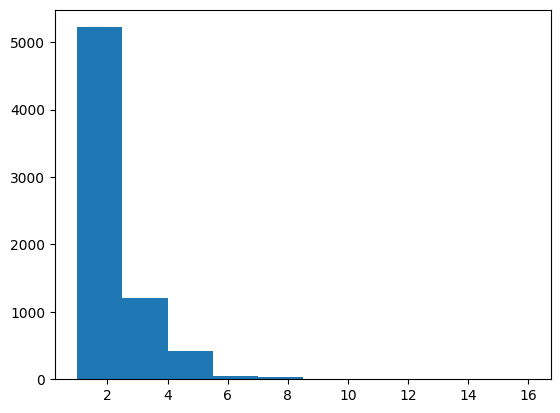

In [28]:
plt.hist(df8.bath)

In [29]:
df8 = df8[df8['bath']<df8['bhk'] + 2]

In [30]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...
10234,other,2 BHK,1095.0,2.0,57.00,2.0,5205.479452
10235,other,2 BHK,1256.0,2.0,65.00,2.0,5175.159236
10237,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333


In [31]:
dummies = pd.get_dummies(df8.location).astype(int)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df9 = pd.concat([df8, dummies.drop('other',axis='columns')],axis='columns')

In [34]:
df9 = df9.drop(['location', 'size', 'price_per_sqft'],axis='columns')

In [35]:
df9.dtypes

total_sqft             float64
bath                   float64
price                  float64
bhk                    float64
1st Block Jayanagar      int32
                        ...   
Yelachenahalli           int32
Yelahanka                int32
Yelahanka New Town       int32
Yelenahalli              int32
Yeshwanthpur             int32
Length: 245, dtype: object

In [36]:
print(df9.dtypes.unique())
print(df9.shape)
df9.head()

[dtype('float64') dtype('int32')]
(6916, 245)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [84]:
X = df9.drop('price',axis=1)
y = df9['price']
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
algos = {
    'linear_regression' : {
        'model' : LinearRegression(), 
        'params' : {
            'positive' : [True,False]
        }
    },
    'Lasso' : {
        'model' : Lasso(), 
        'params' : {
            'alpha' : [1, 2] }
    }
}

cv_scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
for algo_name,config in algos.items():
    gs = GridSearchCV(config['model'],param_grid=config['params'],cv=cv)
    gs.fit(X,y)

    cv_score = {
        'algo' : algo_name, 
        'accuracy' : gs.best_score_,
        'best params' : gs.best_params_
    }
    cv_scores.append(cv_score)

cv_df = pd.DataFrame(cv_scores)
cv_df
    

,algo,accuracy,best params
0,linear_regression,0.829588,{'positive': False}
1,Lasso,0.604123,{'alpha': 2}


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [104]:
#location, total_sqft, bath, bhk

def predict_price(location, total_sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]


In [107]:
predict_price('1st Block Jayanagar', 3000,2,3)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


351.83607451862224

In [108]:
import pickle

In [109]:
with open('price_pred.pkl', 'wb') as file: 
    pickle.dump(lr,file)

In [110]:
import json

In [113]:
columns = {'columns': [x.lower() for x in X.columns]}
with open('column_names.json', "w") as jf:
    jf.write(json.dumps(columns))